# World's largest islands

This dataset `largest-islands.csv` contains information about the 100 largest islands in the world. The unit for the `area` column is km2.

In [12]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'largest-islands.csv'.

# from google.colab import files
# uploaded = files.upload()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('largest-islands.csv')
df.head()

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36


### Project Ideas

- What are the 10 largest islands in the tropics?

- What are the largest islands in each `region`?

- Create a line graph with `area` on the y-axis and `rank` on the x-axis. The data should be ordered by `rank`, from largest to smallest.

- What islands are composed of multiple countries?
	- Hint: try `countries.str.contains(",")`

In [14]:
# YOUR CODE HERE (add more cells as needed)

In [21]:
# data Overview

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('largest-islands.csv')
print(df.head())


      region      island    area                countries    climate  rank
0     Africa  Madagascar  591896               Madagascar    tropics     4
1  Antarctic   Kerguelen    6200  Antarctic Lands, France  temperate    91
2       Asia       Sumba   11153                Indonesia    tropics    65
3       Asia      Hainan   34300                    China    tropics    37
4       Asia      Taiwan   36198                   Taiwan    tropics    36


In [24]:
# Top 10 Tropical Islands by Area

tropical_islands = df.query('climate == "tropics"').nlargest(10, 'area')
print(tropical_islands[['island', 'area', 'countries']])

        island    area                    countries
86  New Guinea  821400  Papua New Guinea, Indonesia
23      Borneo  755000  Indonesia, Malaysia, Brunei
0   Madagascar  591896                   Madagascar
28     Sumatra  480793                    Indonesia
22    Sulawesi  188522                    Indonesia
21        Java  129438                    Indonesia
80        Cuba  109884                         Cuba
26       Luzon  104688                  Philippines
14    Mindanao   94630                  Philippines
73  Hispaniola   76192    Dominican Republic, Haiti


In [25]:
# Larget Island per Region

largest_per_region = df.loc[df.groupby('region')['area'].idxmax()]
print(largest_per_region[['region', 'island', 'area']])


           region                           island     area
0          Africa                       Madagascar   591896
1       Antarctic                        Kerguelen     6200
23           Asia                           Borneo   755000
35        Eurasia                         Sakhalin    76400
41         Europe                        Greenland  2166086
75  North America                    Baffin Island   507451
86        Oceania                       New Guinea   821400
98  South America  Isla Grande de Tierra del Fuego    47992


In [ ]:
# Area vs. Rank Visualization

plt.figure(figsize=(10, 6))
df_sorted = df.sort_values('rank')
plt.plot(df_sorted['rank'], df_sorted['area'], marker='o', linestyle='-')
plt.xlabel('Rank (1 = Largest)')
plt.ylabel('Area (km²)')
plt.title('Island Area by Global Rank')
plt.grid(True)
plt.show()


In [29]:
# Multi-Country Islands

multi_country = df[df['countries'].str.contains(',', na=False)]
print("Islands shared by multiple countries:\n", multi_country[['island', 'countries']])

Islands shared by multiple countries:
                              island                    countries
1                         Kerguelen      Antarctic Lands, France
23                           Borneo  Indonesia, Malaysia, Brunei
45                          Ireland      Ireland, United Kingdom
50                           Cyprus       Cyprus, United Kingdom
73                       Hispaniola    Dominican Republic, Haiti
86                       New Guinea  Papua New Guinea, Indonesia
98  Isla Grande de Tierra del Fuego             Chile, Argentina


<Axes: ylabel='count'>

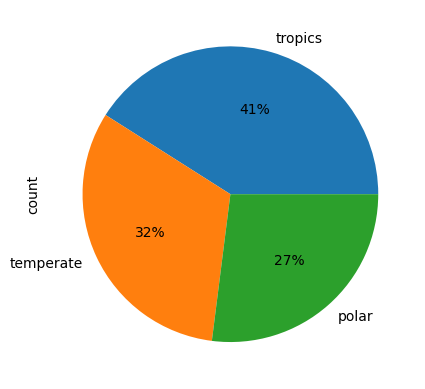

In [28]:
# Climate distribution analysis


climate_counts = df['climate'].value_counts()
climate_counts.plot(kind='pie', autopct='%1.0f%%')

In [ ]:
# ANALYSIS RESULTS 

# Largest Tropical Island: Madagascar (591,896 km²).

# Smallest Ranked Tropical Island (in Top 10): Hispaniola.

# Climate Distribution: Tropics dominate (41% of islands).

